# Markov Chain Monte Carlo

Write a simple MCMC routine to produce $N$ draws $\{x_i\}$ from the scaled/shifted Student-t distribution

$$T(x|\nu,\sigma,\mu)= \frac{\Gamma\left(\frac{\nu+1}{2}\right)} { \Gamma\left(\frac{\nu}{2}\right)\sqrt {\nu\pi\sigma}}\left(1+\frac{1}{\nu}\left(\frac{x-\mu}{\sigma}\right)^2\right)^{-\frac{\nu + 1}{2}},$$

Where the parameters $\nu, \sigma, \mu$ are fixed here, and they define the properties of the distribution. As a concrete example, set them to $\nu = 3, \sigma = 1, \mu = 1.5$. For the proposal distribution you could use a normal random variable with standard distribution $\alpha$.

_(30 Points)_ Run your code trying four different jump size scalings, $\alpha = 0.01, \alpha = 0.1, \alpha = 10.$ Visually inspect the chains. Which one appears to be exploring the distribution most effectively?

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.special import gamma

%matplotlib inline

In [45]:
N = 100000
v = 3
o = 1
u = 1.5
f = lambda x,v,o,u:gamma((v + 1)/2) / (gamma(v/2) * o*(v*np.pi)**0.5) * (1 + 1/v * ((x-u)/o)**2 )**(-(v+1)/2)

def mcmc(a,n, x_0):
    accept = 0
    x = np.zeros(n)
    x[0] = x_0
    
    for i in range(0, n-1):
        y_s = np.random.normal(x[i], a)

        if np.random.rand() < min(1, f(y_s, v, o, u)/f(x[i], v, o, u)):
            x[i+1] = y_s
            accept += 1
        else:
            x[i+1] = x[i]        
    return x, accept

def mcmc_run(a,n,x_0):
    for alpha in a:
        chain, accept = mcmc(alpha, n, x_0)
        yield chain, accept, alpha

def plot_mcmc(chain, accept, alpha, n):
    plt.plot(chain)
    plt.title("alpha={}, acceptance rate = {}%".format(alpha, accept/n*100))
    
def plot_mcmc_hist(chain, accept, alpha, n):
    plt.hist(chain, density=True, bins=30)
    plt.title("alpha={}, acceptance rate = {}%".format(alpha, accept/n*100))
    xs = np.linspace(np.min(chain), np.max(chain), n)
    plt.plot(xs, f(xs, v, o, u))

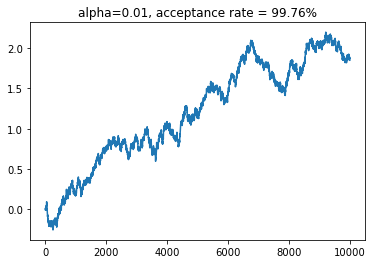

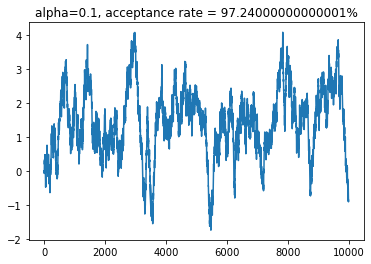

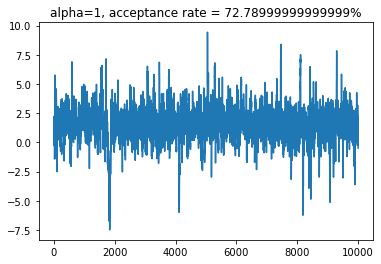

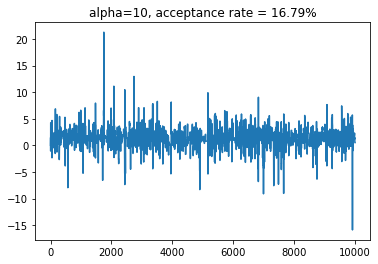

In [51]:
N = 10000
a = [0.01, 0.10, 1, 10]
x_0 = 0

for c, acc, alpha in mcmc_run(a, N, x_0):
    plot_mcmc(c, acc, alpha, N)
    plt.show()

Probably the second and there are several reasons, first of all, for all three, the starting point is $x_0 = 0$, which is closer to the region of higher probability, eventually this will benefit small step sizes, if we started at $x_0 = -1000$, the first one will need a huge amount of iterations to get to explore the regions of higher probability, of course if we take out the number of iterations as a criteria, $\alpha=10$ will be a better option, but this is not the case, beause at each step some other region of interest is explored and eventually it will get closer to the regions of higher probability. We know that the algorithm will try to 'stay' at regions with higher probabilities, but there is also a caveat, in this case the distribution that we are exploring 'resembles' a gaussian bell on the regions of higher probabilities, but if the distribution had some region with a higher probability around our starting point, a plain region and a region with even higher probability such as

<img src="1.png"/>

with our stepsize it could be less likely to explore the second region of interest. This is why $\alpha=0.1$ is also so good at exploring the distribution but at some point this will imply that it will not explore the other side of the distribution by the same argument, eventually it will get to the top and after that it will be less likely to explore the  other regions of the distribution which imply a higher acceptance rate but it is not actually exploring the whole distribution and which is why I consider $\alpha=0.1$ better at exploring.

_(15 Points)_ Using the same previous 4 sets of jumps sizes, run your code for $N=1000$ iterations and use the output to produce histograms of the $\{x_i\}$. PLot them agains the target distribution $T(x|\nu, \sigma, \mu)$. Which distribution looks the best?

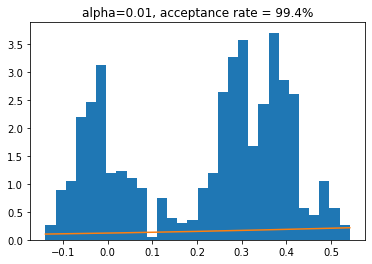

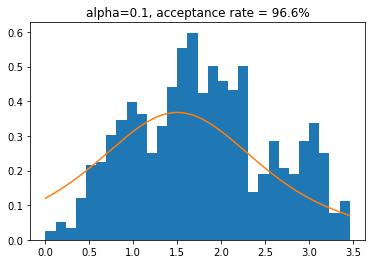

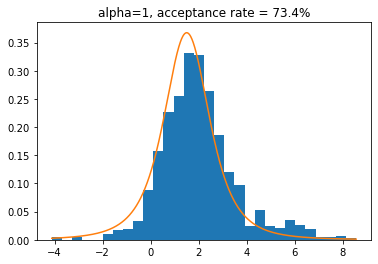

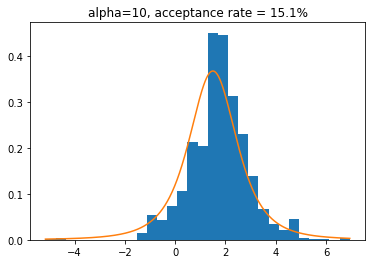

In [53]:
N=1000

chains=[]
for c, acc, alpha in mcmc_run(a, N, x_0):
    chains.append(c)
    plot_mcmc_hist(c, acc, alpha, N)
    plt.show()

Just by visual inspection the first and the second are really far from $T$, we now check which mean approach closer to our known parameter $\mu=1.5$.

In [55]:
np.mean(chains[2]), np.mean(chains[3])

(1.9983177560302143, 1.752450569793059)

The last is closer to the parameter, and therefore approach better.

_(5 points)_ Have your code compute the acceptance fraction for the proposed jumps. Does a high acceptance rate necessarily mean efficient exploration of the distribution?

Not necessarily, by the arguments on the first part of the homework, and by visual inspection of the first and the second we conclude that is not always the case, but to be honest I'm not sure, at the moment I think it tells us how lucky we are by approaching randomly to zones of higher probability overall.